In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from utils import get_regression_metrics
from utils import get_classifier_metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

In [3]:
data =  pd.read_csv('https://breathecode.herokuapp.com/asset/internal-link?id=930&path=diabetes.csv')
data.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


## Analicis Descriptivo

In [4]:
f" Total de filas, {data.shape[0]} total de columnas {data.shape[1]}"

' Total de filas, 768 total de columnas 9'

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [7]:
if data.duplicated().sum():
    data = data.drop_duplicates()

data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## Análisis de Variables

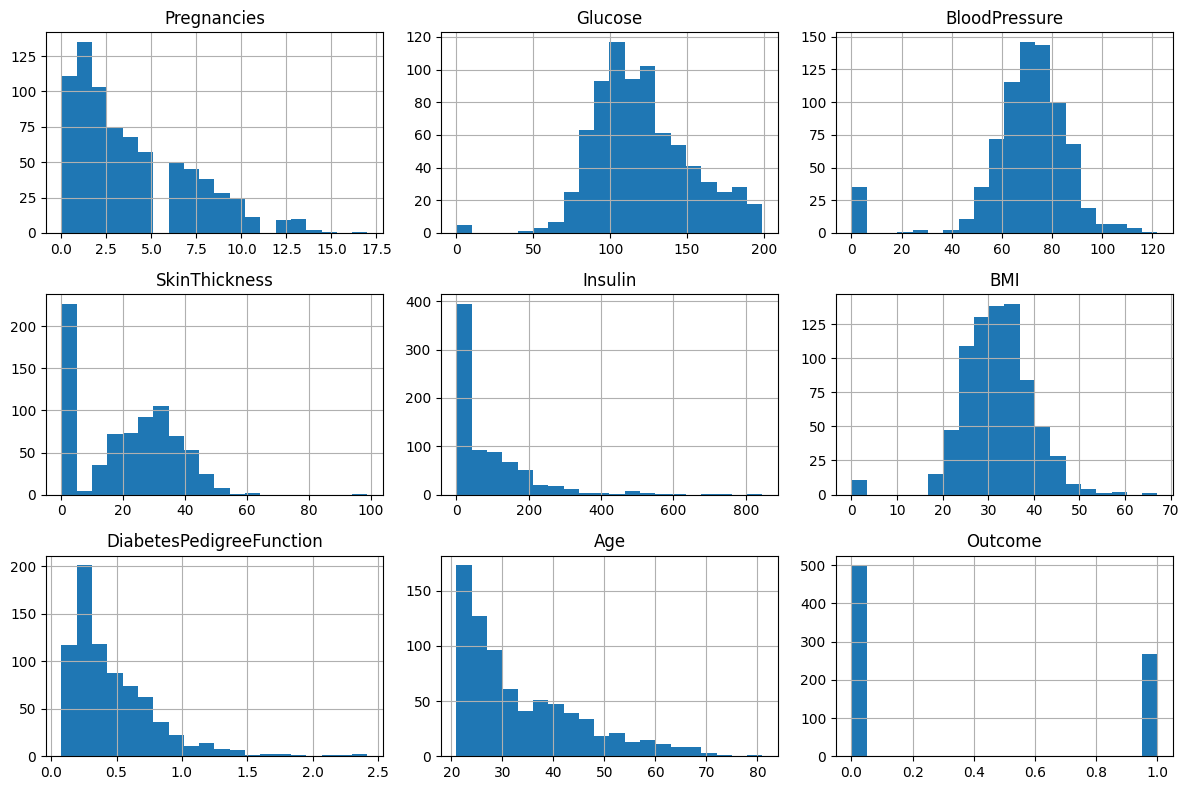

In [8]:
data.hist(bins=20, figsize=(12, 8))
plt.tight_layout()
plt.show()

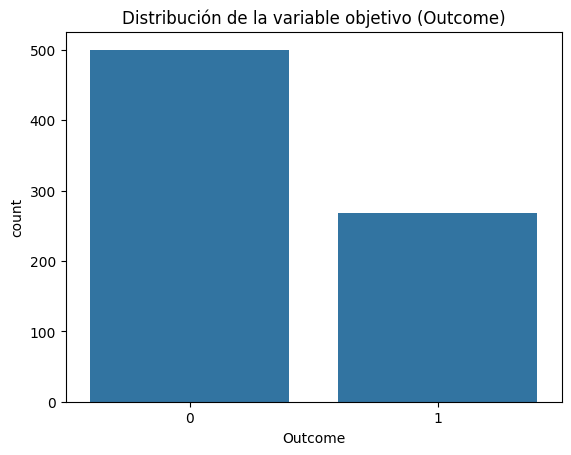

In [9]:
data['Outcome'].value_counts()
data['Outcome'].value_counts(normalize=True) * 100

sns.countplot(x='Outcome', data=data)
plt.title("Distribución de la variable objetivo (Outcome)")
plt.show()

In [10]:
cols_con_ceros_sospechosos = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in cols_con_ceros_sospechosos:
    print(col, (data[col] == 0).sum())

Glucose 5
BloodPressure 35
SkinThickness 227
Insulin 374
BMI 11


En algunas variables como Glucose, BloodPressure, SkinThickness, Insulin y BMI aparecen valores 0, que no son realistas fisiológicamente. Los trataremos como valores faltantes.

In [11]:
data_clean = data.copy()

for col in cols_con_ceros_sospechosos:
    data_clean.loc[data_clean[col] == 0, col] = np.nan

data_clean.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [12]:
for col in cols_con_ceros_sospechosos:
    data_clean[col].fillna(data_clean[col].median(), inplace=True)

data_clean.isna().sum()

/tmp/ipykernel_867/1687786697.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_clean[col].fillna(data_clean[col].median(), inplace=True)
/tmp/ipykernel_867/1687786697.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Graficamos variables con NA sin datos con 0 

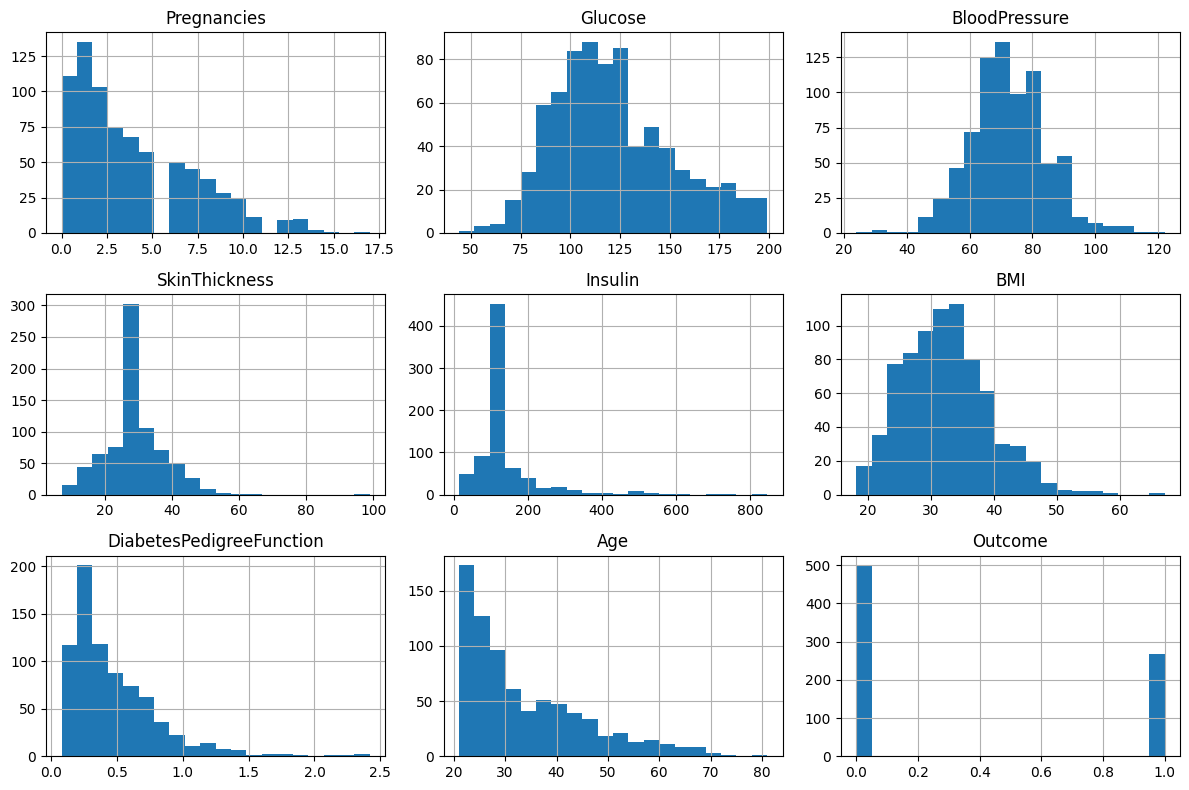

In [13]:
data_clean.hist(bins=20, figsize=(12, 8))
plt.tight_layout()
plt.show()

### Seleccion de variables.

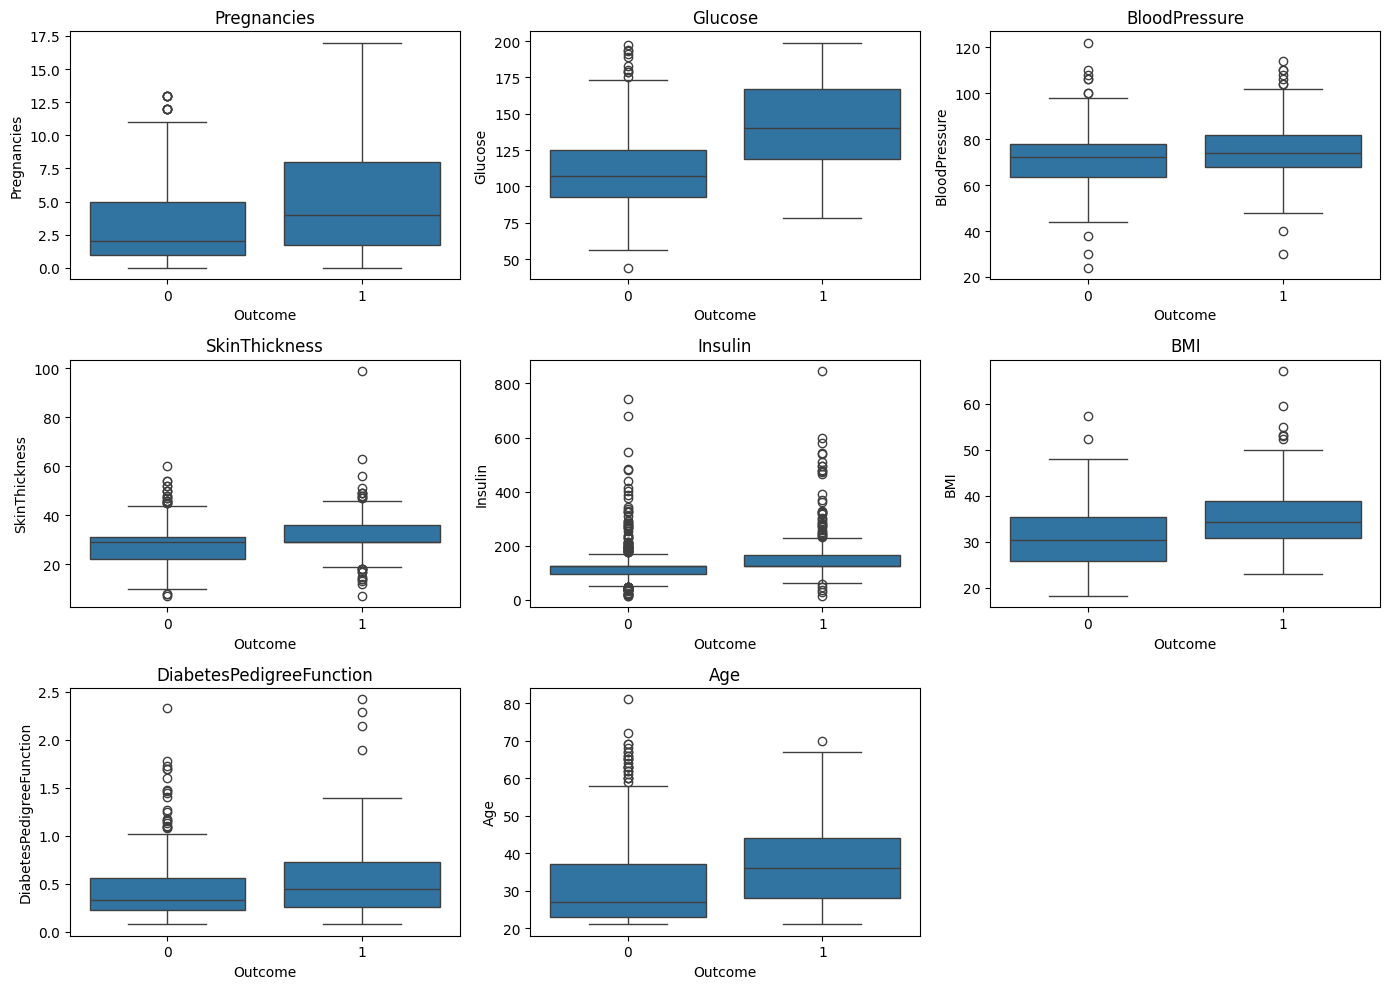

In [14]:
cols_features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
                 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

plt.figure(figsize=(14, 10))
for i, col in enumerate(cols_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='Outcome', y=col, data=data_clean)
    plt.title(col)

plt.tight_layout()
plt.show()

### Correlacion entre variables

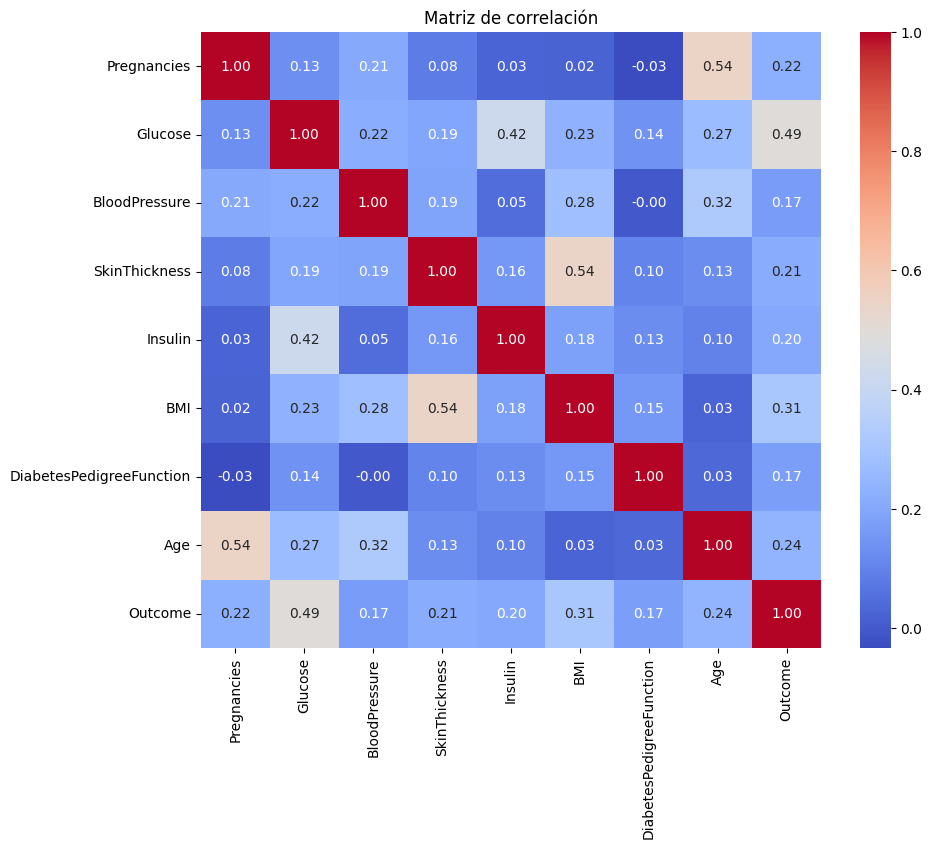

In [15]:
plt.figure(figsize=(10, 8))
corr = data_clean.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Matriz de correlación")
plt.show()

### observasiones
La correlación muestra que la glucosa es lo que más se relaciona con tener diabetes, seguida del BMI y la edad, aunque de forma moderada. El resto de variables casi no se correlacionan mucho con el resultado. También se ve que algunas variables se parecen entre sí, como el BMI y el grosor de piel, o la edad y los embarazos.

In [18]:
data_clean.to_csv("/workspaces/Gupir11-machine-learning/data/processed/df_diabetes", index=False)

## Split

In [ ]:
X = data_clean.drop('Outcome', axis=1)
y = data_clean['Outcome']

In [ ]:
y.unique()

array([1, 0])

Siendo 0 negativo en diabetes y 1, positivo 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=18, stratify=y
)

## Modelo y ajuste

In [ ]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

y_pred = tree_clf.predict(X_test)

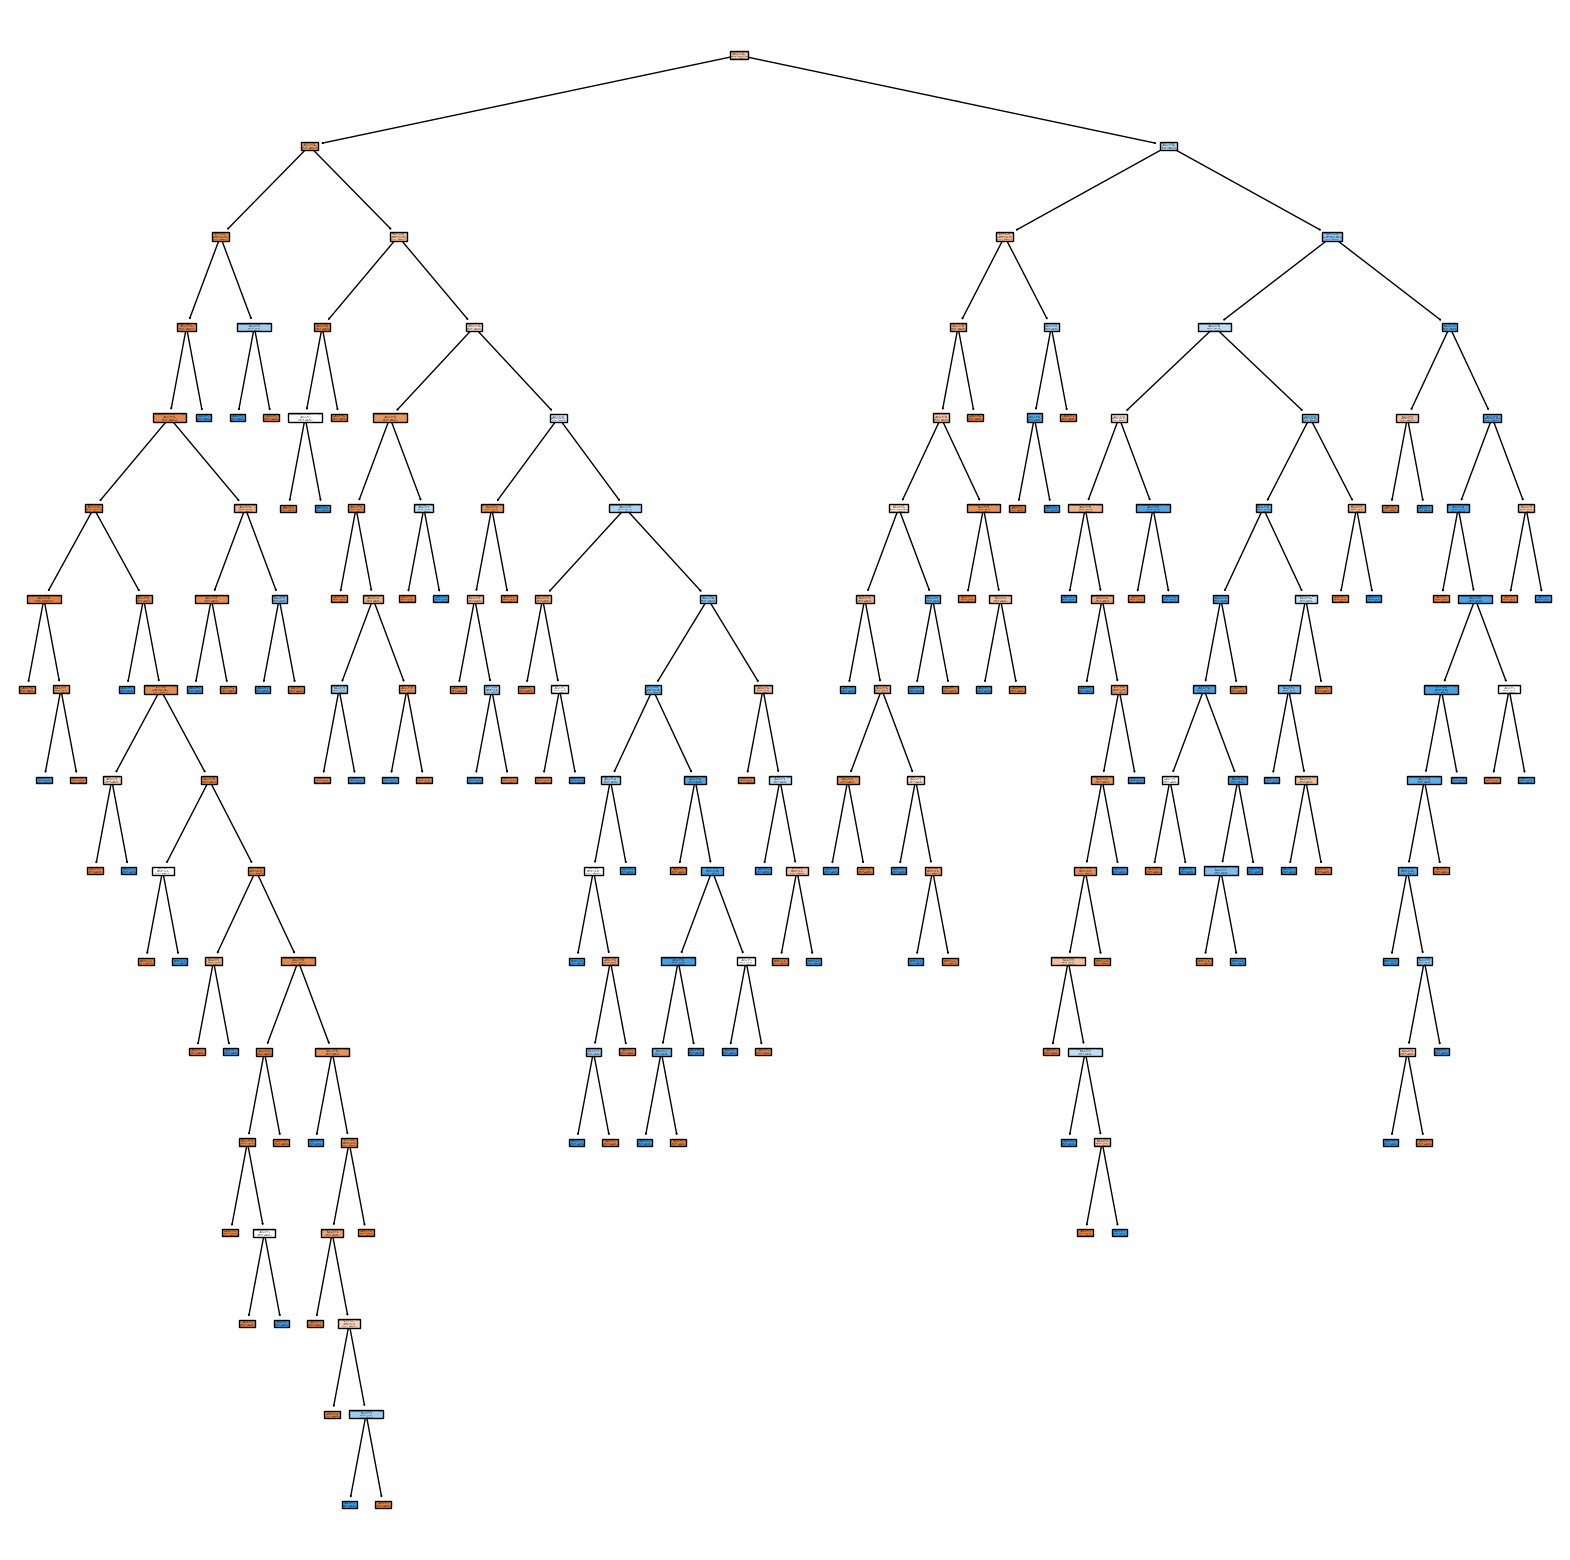

In [ ]:
plt.figure(figsize=(20, 20))

tree.plot_tree(tree_clf,
               feature_names=list(X_train.columns),
               class_names=['negativo', 'positivo'],
               filled=True)
plt.show()

In [ ]:
y_pred_test = tree_clf.predict(X_test)
y_pred_test

array([0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1])

In [ ]:
y_pred_train = tree_clf.predict(X_train)
y_pred_train

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,

In [ ]:
get_classifier_metrics(y_pred_test, y_test, y_pred_train, y_train)

,Accuracy,F1 Score,Precision,Recall
Train set,1.000000,1.000000,1.000000,1.000000
Test set,0.688312,0.688312,0.688312,0.688312


In [ ]:
get_classifier_metrics(y_pred_test, y_test, y_pred_train, y_train, 'macro')

,Accuracy,F1 Score,Precision,Recall
Train set,1.000000,1.000000,1.000000,1.000000
Test set,0.688312,0.657778,0.657778,0.657778


In [ ]:
get_classifier_metrics(y_pred_test, y_test, y_pred_train, y_train, average='weighted')

,Accuracy,F1 Score,Precision,Recall
Train set,1.000000,1.000000,1.000000,1.000000
Test set,0.688312,0.688312,0.688312,0.688312


El modelo de árbol de decisión entrenado inicialmente mostró un fuerte sobreajuste, alcanzando un 100% de exactitud en el conjunto de entrenamiento pero solo un 68% en el conjunto de prueba. Esta diferencia evidenció que el árbol estaba memorizando los datos de entrenamiento en lugar de aprender patrones generalizables.

Se hara optimizacion para intentar mejorar el resultado con GridSearchCV

In [ ]:
param_grid = {
    'max_depth': [3, 4, 5, 6, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 10],
    'criterion': ['gini', 'entropy']
}

In [ ]:
grid = GridSearchCV(
    estimator=tree_clf,
    param_grid=param_grid,
    cv=5,               # 5-fold cross validation
    scoring='accuracy',
    n_jobs=-1           # usa todos los núcleos del CPU
)

grid.fit(X_train, y_train)

,estimator,DecisionTreeC...ndom_state=42)
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': [3, 4, ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [ ]:
f'mejores hiperparametros {grid.best_params_} Mejor accuracy en CV: {grid.best_score_}'

"mejores hiperparametros {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2} Mejor accuracy en CV: 0.7655071304811409"

In [ ]:
best_tree = grid.best_estimator_

y_pred_best = best_tree.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("\nReporte:\n", classification_report(y_test, y_pred_best))

Accuracy: 0.6818181818181818

Reporte:
               precision    recall  f1-score   support

           0       0.76      0.74      0.75       100
           1       0.54      0.57      0.56        54

    accuracy                           0.68       154
   macro avg       0.65      0.66      0.65       154
weighted avg       0.69      0.68      0.68       154



Después de optimizar el árbol de decisión, el modelo quedó mucho más equilibrado. Ya no se “aprende de memoria” los datos como antes, y aunque la precisión en el test sigue rondando el 68%, ahora el modelo generaliza mejor. Funciona bastante bien para identificar a personas sin diabetes, pero le cuesta un poco más detectar a quienes sí la tienen, algo normal porque hay menos casos positivos en el dataset. En resumen: el modelo quedó más estable, más realista y mucho menos sobreajustado.